In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib.gridspec import GridSpec

import create_df

In [47]:
username = 'Tiago'

#import create_df
df = create_df.create_df(username)

In [48]:
categories = df['Category'].unique()

In [49]:
# create a dataframe for each category
df_categories = list()
for category in categories:
    df_category = df.loc[df['Category'] == category].copy()
    df_categories.append(df_category)
    
# convert Item to float if possible, else keep it as string
for df_category in df_categories:
    first_item = df_category['Item'].iloc[0]
    #check if first item is convertible to float
    try:
        float(first_item)
        df_category['Item'] = df_category['Item'].astype('float64')
    except ValueError:
        pass 

In [50]:
def get_category_df(df_categories, category):
    df_category = df_categories[categories.tolist().index(category)]
    return df_category

def get_type_df(df_category, type):
    df_type = df_category.loc[df_category['Type'] == type]
    return df_type

In [51]:
def time_series(type, df):
    values = df['Item']
    dates = df['Date']

    dtFmt = mdates.DateFormatter('%d-%b-%Y %H:%M')

    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(byhour=(range(0,24,24))))
    plt.xticks(rotation=15, fontweight='light')
    
    plt.bar(dates,values, width=0.1, color=['purple','green','blue','yellow','orange','red','pink','brown','grey','black'])
    plt.title(category + ' - ' + type)
    plt.xlabel('Date')
    plt.ylabel('Item')

In [52]:
# pie chart of types
def pie_chart(df):
    types = df['Type'].unique()
    values = list()

    if df['Item'].dtype == 'float64':
        for type in types:
            df_type = df.loc[df['Type'] == type]
            values.append(df_type['Item'].sum())

        explode = [0.1 for i in range(len(types))]
        plt.pie(values, labels=types, explode=explode, autopct='%1.1f%%',colors=['red', 'orange', 'yellow', 'blue', 'green', 'purple'])
    else:
        values = df['Type'].value_counts()

        explode = [0.1 for i in range(len(types))]
        plt.pie(values, labels=types, explode=explode, autopct='%1.1f%%',colors=['red', 'orange', 'yellow', 'blue','green','purple'])

    plt.title('Pie chart of ' + category)

def pie_chart_all_categories(df):
    unique_categories = df['Category'].unique()

    values = list()

    values = df['Category'].value_counts()

    explode = [0.1 for i in range(len(categories))]
    plt.pie(values, labels=unique_categories, explode=explode, autopct='%1.1f%%',colors=['red', 'orange', 'yellow', 'blue','green','purple','brown','grey','black','pink'])

    plt.title('Pie chart of all categories')

In [53]:
# bar chart of types
def bar_chart(df):
    types = df['Type'].unique()
    values = list()

    if df['Item'].dtype == 'float64':
        for type in types:
            df_type = df.loc[df['Type'] == type]
            values.append(df_type['Item'].sum())

        plt.bar(types, values, color=['red', 'orange', 'yellow', 'blue', 'green', 'purple'])
        for i, v in enumerate(values):
            plt.text(i, v-max(values)/15, str(round(v,2)), color='black', ha='center')
    else:
        for type in types:
            values.append(len(df.loc[df['Type']==type]))
        plt.bar(types, values, color=['red', 'orange', 'yellow', 'blue', 'green', 'purple'])

    plt.title('Bar chart of ' + category)

In [54]:
def plot_in_one(df_category, df_type, df):
    fig = plt.figure(figsize=(10, 5))
    gs = GridSpec(nrows=2, ncols=3,hspace = .3)

    ax0 = fig.add_subplot(gs[0, 0])
    pie_chart_all_categories(df)

    ax1 = fig.add_subplot(gs[0, 1])
    pie_chart(df_category)

    ax2 = fig.add_subplot(gs[0, 2])
    bar_chart(df_category)

    ax3 = fig.add_subplot(gs[1, :])
    time_series(type,df_type)

    plt.show()

Categories of Tiago :
 ['Series' 'Gastos' 'Contas' 'Alimentação' 'Transporte' 'Songs' 'Neopolis'
 'Gym']

Types of Gastos :
 ['Uber' 'Compras' 'Lanche' 'Refeições' 'Geral' 'Gulodices' 'Trotinete']


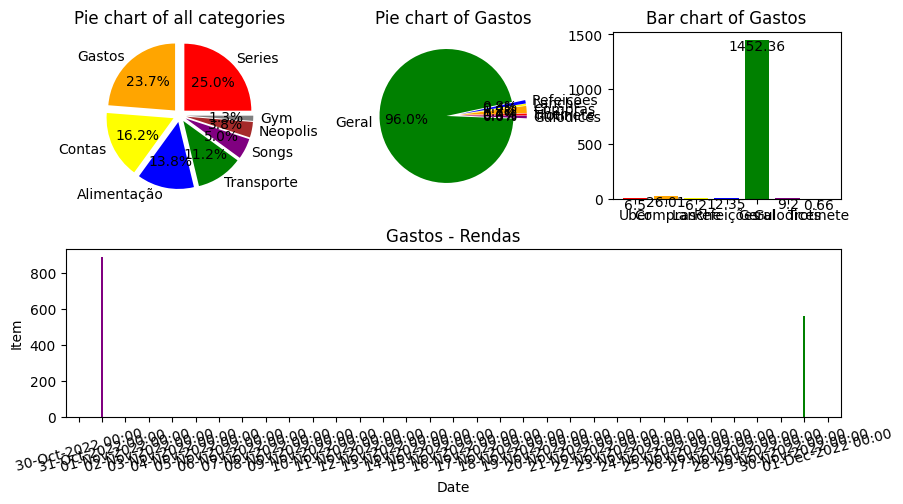

In [55]:
category = 'Gastos'
type_of = 'Geral'

df_category = get_category_df(df_categories, category)
df_type = get_type_df(df_category, type_of)

print('Categories of', username,':\n', categories)
print('\nTypes of', category,':\n', df_category['Type'].unique())

plot_in_one(df_category, df_type,df)